<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/JOB_A_THON_August_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predict CTR of an Email Campaign

## Problem Statement


Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them.


Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).


CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered to.


CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered


CTR depends on multiple factors like design, content, personalization, etc. 


How do you design the email content effectively?
What should your subject line look like?
What should be the length of the email?
Do you need images in your email template?

As a part of the Data Science team, in this hackathon, you will build a smart system to predict the CTR for email campaigns and therefore identify the critical factors that will help the marketing team to maximize the CTR.

## Objective


Your task at hand is to build a machine learning-based approach to predict the CTR of an email campaign.

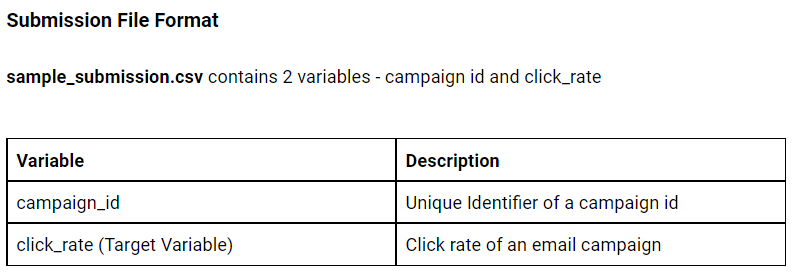

## Evaluation metric

The evaluation metric for this hackathon would be r2_score.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Import Data Processing Packages

In [2]:
import pandas as pd
import numpy as np
#
import seaborn as sns
import matplotlib.pyplot as plt
#
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/AV_HACK_JOBATHON/August_2022/train_F3fUq2S.csv")
df_test = pd.read_csv("/content/drive/MyDrive/AV_HACK_JOBATHON/August_2022/test_Bk2wfZ3.csv")

## Summary Statistics

In [6]:
df_train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [5]:
print(f" Training Sample - number of rows : {df_train.shape[0]} , num of columns : {df_train.shape[1]}")
print(f" Testing Sample - number of rows : {df_test.shape[0]} , num of columns : {df_test.shape[1]}")

 Training Sample - number of rows : 1888 , num of columns : 22
 Testing Sample - number of rows : 762 , num of columns : 21


#### Checking null values

In [9]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Series([], dtype: int64)

In [10]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Series([], dtype: int64)

In [12]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
campaign_id,1888.0,944.500000,545.162973,1.0,472.750000,944.500000,1416.250000,1888.000000
sender,1888.0,4.395657,3.277927,0.0,3.000000,3.000000,3.000000,15.000000
subject_len,1888.0,86.246292,30.143206,9.0,69.000000,83.000000,98.000000,265.000000
body_len,1888.0,14185.780191,7327.615307,23.0,9554.500000,12689.000000,17351.500000,44491.000000
mean_paragraph_len,1888.0,35.239407,28.139498,4.0,21.000000,29.000000,40.000000,286.000000
day_of_week,1888.0,2.828390,1.763193,0.0,1.000000,3.000000,4.000000,6.000000
is_weekend,1888.0,0.199682,0.399867,0.0,0.000000,0.000000,0.000000,1.000000
category,1888.0,9.949682,5.300719,0.0,6.000000,10.000000,15.000000,15.000000
product,1888.0,17.525424,12.369526,0.0,9.000000,12.000000,27.250000,43.000000
no_of_CTA,1888.0,4.222458,4.628348,0.0,2.000000,3.000000,5.000000,49.000000


* Not concentrating on ouliers as have decided to go with tree based models as already the training sample is less

In [13]:
cat_features = [col for col in df_test.columns if df_test[col].dtypes == 'O']

In [14]:
cat_features

['times_of_day']

In [19]:
for col in df_train.columns:
  print(f"columns : {col} nunique : {df_train[col].nunique()}")

columns : campaign_id nunique : 1888
columns : sender nunique : 12
columns : subject_len nunique : 170
columns : body_len nunique : 1568
columns : mean_paragraph_len nunique : 121
columns : day_of_week nunique : 7
columns : is_weekend nunique : 2
columns : times_of_day nunique : 3
columns : category nunique : 16
columns : product nunique : 43
columns : no_of_CTA nunique : 40
columns : mean_CTA_len nunique : 79
columns : is_image nunique : 6
columns : is_personalised nunique : 2
columns : is_quote nunique : 7
columns : is_timer nunique : 1
columns : is_emoticons nunique : 6
columns : is_discount nunique : 2
columns : is_price nunique : 8
columns : is_urgency nunique : 2
columns : target_audience nunique : 17
columns : click_rate nunique : 1810


* eliminate campaing_id  as the all the samples are unique

In [21]:
new_train = df_train.drop(['campaign_id'],axis=1)
new_test = df_test.drop(['campaign_id'],axis=1)

## Exploratory Data Analysis

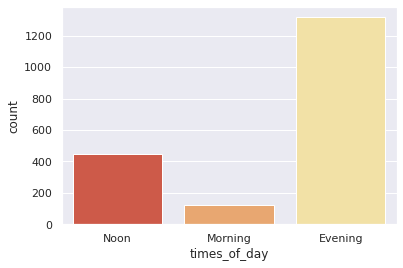

In [22]:
sns.set_theme(style='darkgrid',palette='RdYlGn')
sns.countplot(new_train['times_of_day'])
plt.show()

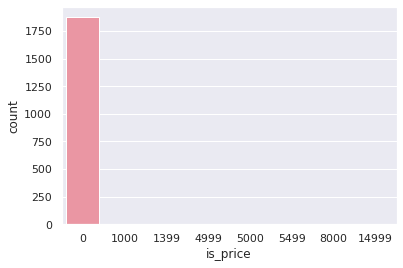

In [43]:
sns.set_theme(style='darkgrid',palette='RdYlGn')
sns.countplot(new_train['is_price'])
plt.show()

<Figure size 792x576 with 0 Axes>

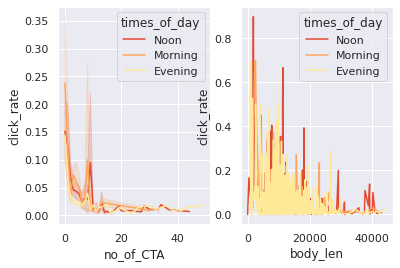

In [32]:
plt.figure(figsize=(11,8))
fig, axes = plt.subplots(1, 2)
sns.lineplot(x='no_of_CTA',y='click_rate',data=new_train,hue='times_of_day',ax=axes[0])
sns.lineplot(x='body_len',y='click_rate',data=new_train,hue='times_of_day',ax=axes[1])
plt.show()

In [33]:
times_of_day_map = {'Morning':0,'Noon':1,'Evening':2}
new_train['times_of_day'] = new_train['times_of_day'].map(times_of_day_map)
new_test['times_of_day'] = new_test['times_of_day'].map(times_of_day_map)

## Correlation

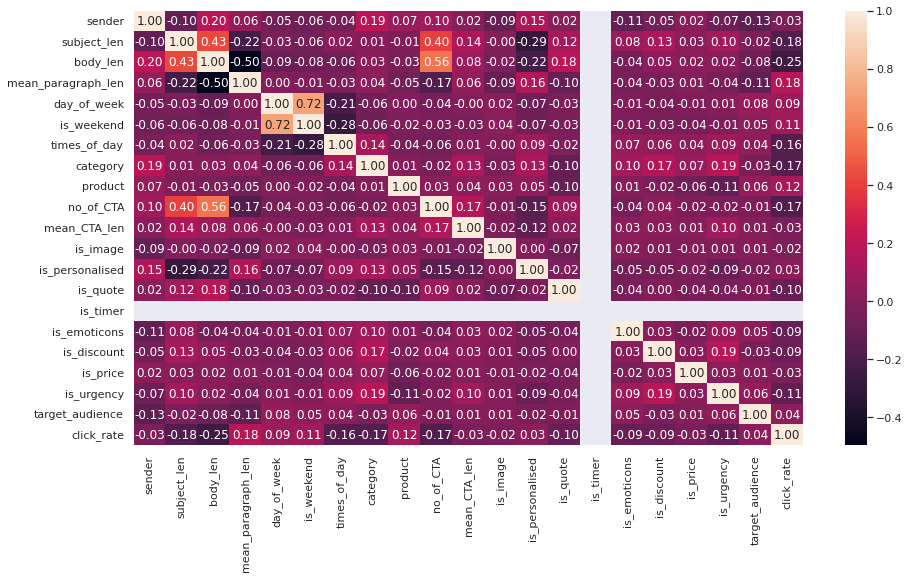

In [41]:
plt.figure(figsize=(15,8))
corr_mat = new_train.corr()
sns.heatmap(corr_mat,annot=True,fmt=".2f")
plt.show()

* is_timer --> Removed as it has only one class, and Doesn't affect the performance of the model.
* is_price --> Removed as the contribution of Boolean value(True) is negligible comparing to 1.

In [45]:
new_train["is_timer"].value_counts(normalize=True)

0    1.0
Name: is_timer, dtype: float64

In [44]:
new_train['is_price'].value_counts(normalize=True)

0        0.993114
5499     0.002648
8000     0.001059
5000     0.001059
4999     0.000530
1399     0.000530
1000     0.000530
14999    0.000530
Name: is_price, dtype: float64

In [46]:
new_train['is_emoticons'].value_counts(normalize=True)

0    0.861229
1    0.091102
2    0.028602
3    0.015890
4    0.002119
6    0.001059
Name: is_emoticons, dtype: float64

*  Checking for values in boolean columns in case there are more values other then 0 and 1

In [51]:
for col in new_train.columns:
  if col.startswith('is_'):
    print(col)
    print(" "*80)
    print(new_train[col].value_counts(normalize=True))
    print("*"*80)

is_weekend
                                                                                
0    0.800318
1    0.199682
Name: is_weekend, dtype: float64
********************************************************************************
is_image
                                                                                
0    0.379237
1    0.362818
2    0.234110
3    0.020657
6    0.002119
4    0.001059
Name: is_image, dtype: float64
********************************************************************************
is_personalised
                                                                                
0    0.943326
1    0.056674
Name: is_personalised, dtype: float64
********************************************************************************
is_quote
                                                                                
0    0.468750
1    0.337924
2    0.120233
3    0.049258
4    0.014301
5    0.006356
6    0.003178
Name: is_quote, dtype: float64
*****************